In [59]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

In [60]:
#Read in both CSV's
mouse_drug_df = pd.read_csv("/Users/samuelgiddins/desktop/matplotlib-challenge/mouse_drug_data.csv")
trial_df = pd.read_csv("/Users/samuelgiddins/desktop/matplotlib-challenge/clinicaltrial_data.csv")

#Merge CSVs to get full dataframe
total_df = pd.merge(trial_df, mouse_drug_df, how="left", on="Mouse ID")
total_df.head()

#Tumor response to treatment

#Display relevant columns, group by drug and timepoint, and extract mean values in new dataframe
total_df_means = total_df[["Drug", "Timepoint", "Tumor Volume (mm3)"]].groupby(["Drug", "Timepoint"]).mean()
total_df_means.head()

#Do the same with standard errors
total_df_sems = total_df[["Drug", "Timepoint", "Tumor Volume (mm3)"]].groupby(["Drug", "Timepoint"]).sem()
total_df_sems.head()

#Data Munging (Means)
scatter_df_means = total_df_means.reset_index()
finalplt_df_means = scatter_df_means.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
finalplt_df_means.head()

#Data Munging (Standard Errors)
scatter_df_sem = total_df_sems.reset_index()
finalplt_df_sem = scatter_df_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
finalplt_df_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


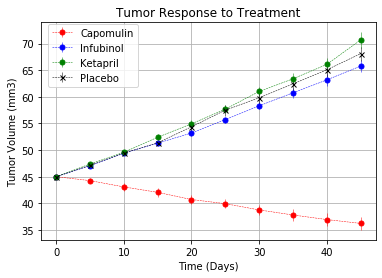

In [61]:
#Create the plot for Tumor Response to Treatment
drug_list = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
plt.errorbar(finalplt_df_means.index, finalplt_df_means["Capomulin"], yerr=finalplt_df_sem["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(finalplt_df_means.index, finalplt_df_means["Infubinol"], yerr=finalplt_df_sem["Infubinol"], color="b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(finalplt_df_means.index, finalplt_df_means["Ketapril"], yerr=finalplt_df_sem["Ketapril"], color="g", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(finalplt_df_means.index, finalplt_df_means["Placebo"], yerr=finalplt_df_sem["Placebo"], color="black", marker="x", markersize=5, linestyle="dashed", linewidth=0.50)
plt.grid(True)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.figlegend(drug_list, bbox_to_anchor=(0.23, 0.1, 0.1, 0.8))

plt.savefig("tumor_volume.png")
plt.show()

In [62]:
#Metastatic Sites
#Display relevant columns, group by drug and timepoint, and extract mean values in new dataframe
total_df_mss = total_df[["Drug", "Timepoint", "Metastatic Sites"]].groupby(["Drug", "Timepoint"]).mean()
total_df_mss.head()

#Do the same with standard errors
total_df_mss_sem = total_df[["Drug", "Timepoint", "Metastatic Sites"]].groupby(["Drug", "Timepoint"]).sem()
total_df_mss_sem.head()

#Data Munging (Means)
scatter_df_mss = total_df_mss.reset_index()
finalplt_df_mss = scatter_df_mss.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
finalplt_df_mss.head()

#Data Munging (Standard Errors)
scatter_df_mss_sem = total_df_mss_sem.reset_index()
finalplt_df_mss_sem = scatter_df_mss_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
finalplt_df_mss_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


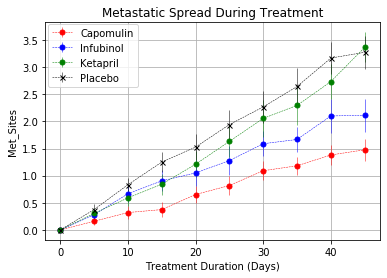

In [63]:
#Create the Scatter plot
drug_list = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
plt.errorbar(finalplt_df_mss.index, finalplt_df_mss["Capomulin"], yerr=finalplt_df_mss_sem["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(finalplt_df_mss.index, finalplt_df_mss["Infubinol"], yerr=finalplt_df_mss_sem["Infubinol"], color="b", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(finalplt_df_mss.index, finalplt_df_mss["Ketapril"], yerr=finalplt_df_mss_sem["Ketapril"], color="g", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(finalplt_df_mss.index, finalplt_df_mss["Placebo"], yerr=finalplt_df_mss_sem["Placebo"], color="black", marker="x", markersize=5, linestyle="dashed", linewidth=0.50)
plt.grid(True)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met_Sites")
plt.figlegend(drug_list, bbox_to_anchor=(0.23, 0.1, 0.1, 0.8))

plt.savefig("metastatic_sites.png")
plt.show()

In [112]:
#Mouse Survival
#Display relevant columns, group by drug and timepoint, and extract mean values in new dataframe
total_df_count = total_df[["Drug", "Timepoint", "Metastatic Sites"]].groupby(["Drug", "Timepoint"]).count()

#Data Munging
scatter_df_count = total_df_count.reset_index()
finalplt_df_count = scatter_df_count.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
finalplt_df_count.head()

#Convert to percentages for plot
final_df_pct = (finalplt_df_count / finalplt_df_count.loc[0]) * 100
final_df_pct

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


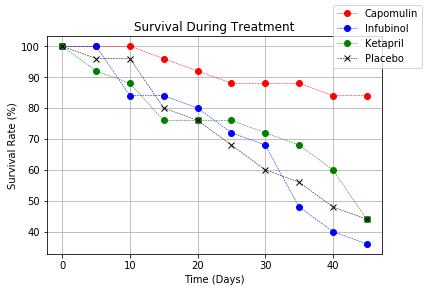

In [107]:

#Create the Scatter plot
drug_list = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
plt.plot(final_df_pct.index, final_df_pct["Capomulin"], color="r", marker="o", linestyle="dashed", linewidth=0.50)
plt.plot(final_df_pct.index, final_df_pct["Infubinol"], color="b", marker="o", linestyle="dashed", linewidth=0.50)
plt.plot(final_df_pct.index, final_df_pct["Ketapril"], color="g", marker="o", linestyle="dashed", linewidth=0.50)
plt.plot(final_df_pct.index, final_df_pct["Placebo"], color="black", marker="x", linestyle="dashed", linewidth=0.50)
plt.grid(True)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.figlegend(drug_list)

plt.savefig("survival_rate.png")
plt.show()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


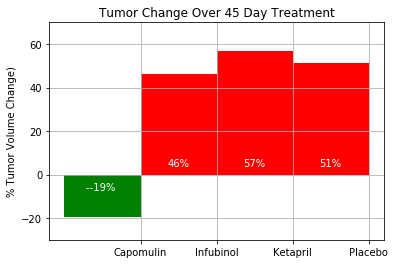

In [110]:
#Store relevant percent changes into a tuple
tumor_pct_change =  100 * (finalplt_df_means.iloc[-1] - finalplt_df_means.iloc[0]) / finalplt_df_means.iloc[0]
pct_changes = (tumor_pct_change["Capomulin"], 
               tumor_pct_change["Infubinol"], 
               tumor_pct_change["Ketapril"], 
               tumor_pct_change["Placebo"])

#graph formatting
fig, ax = plt.subplots() 
ind = np.arange(len(pct_changes))
ind
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change)")
plt.grid(True)

ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])

#splice data between pass and fail and label % changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

#call the functions
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Show the Figure
plt.savefig("summary_bar.png")
fig.show()

#Summary
##1. Infubinol and Ketapril had very similar test results to the placebo and thus, are likely ineffective treatments.<br>
##2. Capomulin was the only treatment that actually contributed to a decrease in tumor volume over time.
<br>
##3. Over the course of a longer treatment, Infubinol seems to control the increase of metastatic sites better than Ketapril and no treatment at all (Placebo).<br>